# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [1]:
#Your code here
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/data-20240721T055441Z-001.zip', 'r')
zip_ref.extractall('directory')
zip_ref.close()



In [5]:
directory= '/content/directory/data'

In [28]:
data=  tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [29]:
data_iterator=data.as_numpy_iterator()


In [30]:
batch=data_iterator.next()
batch[1]

array([3, 3, 2, 1, 1, 1, 0, 1, 1, 3, 3, 2, 0, 3, 2, 3, 0, 2, 3, 3, 1, 1,
       3, 2, 3, 1, 2, 0, 0, 2, 1, 1], dtype=int32)

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

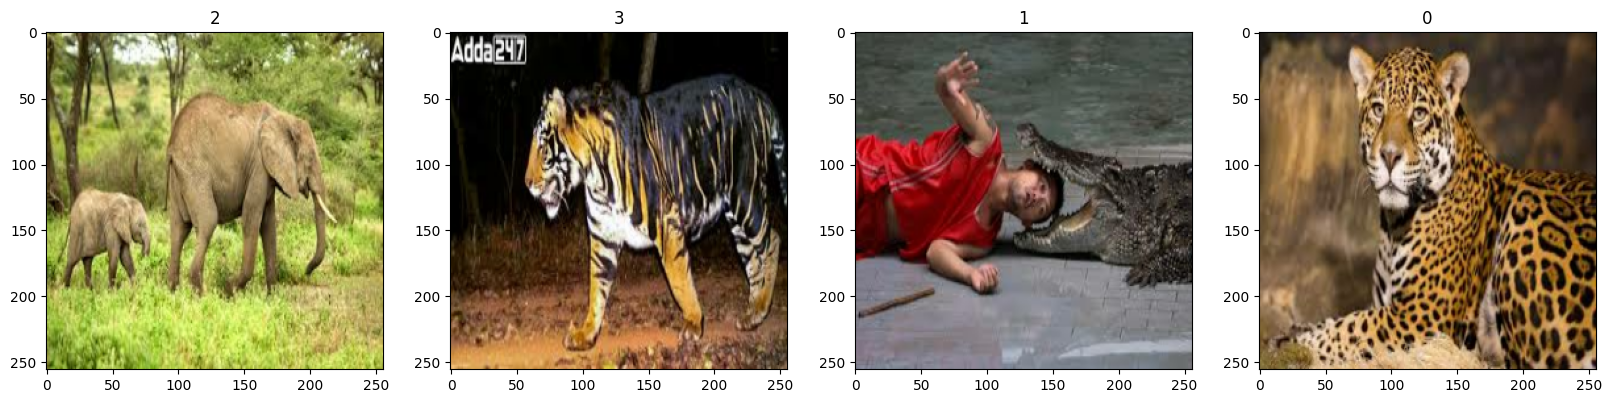

In [9]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [31]:
def normalize(image, label):

    image = image / 255.0
    return image, label

dataset =data.map(lambda image, label: normalize(image, label))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [66]:
import math
total_samples = 1658
batch_size = 32

# Define the dataset sizes
train_size = int(total_samples * 0.7)  # 70% for training
validation_size = int(total_samples * 0.2)  # 20% for validation
test_size = total_samples - train_size - validation_size  # Remaining for testing

# Create train, validation, and test datasets
train_dataset = dataset.take(math.ceil(train_size / batch_size))
validation_dataset = dataset.skip(math.ceil(train_size / batch_size)).take(math.ceil(validation_size / batch_size))
test_dataset = dataset.skip(math.ceil(train_size / batch_size) + math.ceil(validation_size / batch_size))

# Check the shapes of the datasets
for images, labels in train_dataset.take(1):
    print('Train dataset - Images shape:', images.shape)
    print('Train dataset - Labels shape:', labels.shape)

for images, labels in validation_dataset.take(1):
    print('Validation dataset - Images shape:', images.shape)
    print('Validation dataset - Labels shape:', labels.shape)

for images, labels in test_dataset.take(1):
    print('Test dataset - Images shape:', images.shape)
    print('Test dataset - Labels shape:', labels.shape)


Train dataset - Images shape: (32, 256, 256, 3)
Train dataset - Labels shape: (32,)
Validation dataset - Images shape: (32, 256, 256, 3)
Validation dataset - Labels shape: (32,)
Test dataset - Images shape: (32, 256, 256, 3)
Test dataset - Labels shape: (32,)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [65]:
model= Sequential()

model.add(Conv2D(64, kernel_size= (3,3),padding= 'same', activation = 'relu', input_shape= (256, 256, 3) ))
model.add(BatchNormalization())
model.add (MaxPooling2D(pool_size=(2,2), strides= 2, padding= 'valid'))

model.add(Conv2D(128, kernel_size= (3,3),padding= 'same', activation = 'relu' ))
model.add(BatchNormalization())
model.add (MaxPooling2D(pool_size=(2,2), strides= 2, padding= 'valid'))

model.add(Conv2D(128, kernel_size= (3,3),padding= 'same', activation = 'relu' ))
model.add(BatchNormalization())
model.add (MaxPooling2D(pool_size=(2,2), strides= 2, padding= 'valid'))


model.add(Conv2D(256, kernel_size= (3,3),padding= 'same', activation = 'relu' ))
model.add(BatchNormalization())
model.add (MaxPooling2D(pool_size=(2,2), strides= 2, padding= 'valid'))


model.add(Flatten())

model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation= 'relu' ))
model.add(Dropout(0.3))
model.add(Dense(4, activation= 'softmax'))


**Q.6** Compile your model

In [67]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 batch_normalization_39 (Ba  (None, 256, 256, 64)      256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 batch_normalization_40 (Ba  (None, 128, 128, 128)     512       
 tchNormalization)                                               
                                                     

In [68]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [69]:
history= model.fit(train_dataset, epochs= 25, validation_data= validation_dataset)

Epoch 1/25
37/37 [==============================] - 28s 462ms/step - loss: 6.2571 - accuracy: 0.3243 - val_loss: 1.9738 - val_accuracy: 0.2500
Epoch 2/25
37/37 [==============================] - 18s 471ms/step - loss: 3.8327 - accuracy: 0.3345 - val_loss: 1.5307 - val_accuracy: 0.2273
Epoch 3/25
37/37 [==============================] - 18s 465ms/step - loss: 2.8645 - accuracy: 0.2981 - val_loss: 1.5877 - val_accuracy: 0.2301
Epoch 4/25
37/37 [==============================] - 20s 485ms/step - loss: 2.0936 - accuracy: 0.3260 - val_loss: 1.3898 - val_accuracy: 0.3352
Epoch 5/25
37/37 [==============================] - 19s 475ms/step - loss: 1.7352 - accuracy: 0.3454 - val_loss: 1.4653 - val_accuracy: 0.2955
Epoch 6/25
37/37 [==============================] - 20s 519ms/step - loss: 1.4627 - accuracy: 0.3894 - val_loss: 1.4957 - val_accuracy: 0.2898
Epoch 7/25
37/37 [==============================] - 18s 471ms/step - loss: 1.4315 - accuracy: 0.3961 - val_loss: 1.5370 - val_accuracy: 0.3097

**Q.8** Test your code with test set

In [71]:
loss,accuracy= model.evaluate(test_dataset)

4/4 [==============================] - 8s 51ms/step - loss: 0.3437 - accuracy: 0.8607


In [72]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.8606557250022888


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**